In [2]:
# Experiment:
# The three critical pairs are: p vs q-1, q vs p+1, q-1 vs p+1
# Plot the margin of those pairs as a function of alpha
# Start by doing that for n=7, p=5, q=3
# Plot the overall ranking system for different values of k_o: k_o=0.5, 0.49, 0.45, 0.35

# Set parameters (n,p,q,k_o_array)
# Rank arrays for each k_o
# Function to get margin from rank
# Print 

In [3]:
import numpy as np
import matplotlib.pyplot as plt

#This file does not have all the tests on purpose

#Set Parameters
n = 7
k_o = .499
k_s = 1
alpha = 1 - (2 * (k_o/k_s))
alpha_prime = k_o/k_s
p = 5
q = 3
c_var = 0
lamb_val = np.arccosh((1+c_var)/(1-alpha))

K = {}
K_exp = {}
A = {}

arr_len = n-1
dual_len = (n-1) * 2
dual_len_exp = (n-1)*2 + 2
a = np.zeros(dual_len)
a_exp = np.zeros(dual_len_exp)
b = np.zeros(arr_len)
b_bar = np.zeros(arr_len)
c = np.zeros(1)
c_bar = np.zeros(1) 

In [4]:
def check_variables():
    print('n: ', n)
    print('alpha: ', alpha)
    print('k_s: ', k_s)
    print('k_o: ', k_o)
    print('alpha_prime: ', alpha_prime)
    print('c_var', c_var)
    print('lamb_val', lamb_val)
    print('a', a)
    print('a_exp', a_exp)
    print('b', b)
    print('c', c)

#K matrix without exceptions
    # return_k = false -> returns offset diagonal  
def tridiag(n):
    arr_len = n-1
    diag_len = arr_len-1
    B = np.diag(np.ones((diag_len)), k=1) + np.diag(np.ones((diag_len)), k=-1)
    return B        

def k_create(n, alpha_prime):
    arr_len = n-1
    A = np.identity(arr_len)
    D = A
    B = alpha_prime*tridiag(n)
    C = B
    E = np.block([[A,B],[B,A]])
    return E

def y_create(n):
    A = np.ones(n-1)
    B = A * -1
    D = np.concatenate([A, B])
    return D

def a_create(n, alpha_prime):
    K = k_create(n, alpha_prime)
    y = y_create(n)
    a = np.linalg.solve(K, y)
    return a

K = k_create(n,alpha_prime)
print('K', '\n', K)
print('det:', np.linalg.det(K))

y = y_create(n)
a = a_create(n, alpha_prime)

#creates a vector for exceptions (only works for exception cases!)
def e_i(n, i):
    len_arr = n-1
    array_pos = i-1     #(-1 to normalize), p and q refer to normal indices (from 1 to len_arr)
    arr = np.zeros(len_arr)
    if i > 0 and i < n: #if outside, k_o excluded from similarity matrix e.g. AE exception for n=5
        arr[array_pos] = 1 
    return arr

#sides matrix in k_exp representing exceptions
def k_exp_horiz(n, p, q, alpha_prime):
    A = e_i(n, p) + e_i(n, q-1)
    B = e_i(n, q) + e_i(n, p-1)
    C = e_i(n, p-1) + e_i(n, q)
    D = e_i(n, q-1) + e_i(n, p)
    E = alpha_prime * np.block([[A,C],[B,D]])
    return E

def k_create_excep(n, p, q, alpha_prime):
    K = k_create(n, alpha_prime)
    E_1 = k_exp_horiz(n, p, q, alpha_prime)
    E_2 = E_1.transpose()
    E_3 = np.identity(2) #2 since there's only 2 columns for exceptions
    
    W = np.concatenate([K, E_1])
    X = np.concatenate([E_2, E_3])
    Z = np.concatenate([W, X], 1)
    return Z

def y_create_exp(n):
    A = np.ones(n-1)
    B = A * -1
    C = np.array([1, -1])
    D = np.concatenate([A, B, C])
    return D

def a_exp_create(n, p, q, alpha_prime):
    K_exp = k_create_excep(n, p, q, alpha_prime)
    y_exp = y_create_exp(n)
    a_exp = np.linalg.solve(K_exp, y_exp)
    return a_exp

K_exp = k_create_excep(n, p, q, alpha_prime)
y_exp = y_create_exp(n)
a_exp = a_exp_create(n, p, q, alpha_prime)

# Create a dictionary with keys generated using the index and values from the array
def create_bc(n,p,q,alpha_prime):
    a_exp = a_exp_create(n,p,q,alpha_prime)
    num_coeff = n-1
    b = {i: a_exp[i-1] for i in range(1, num_coeff + 1)}
    b_bar = {i: a_exp[i-1+n-1] for i in range(1, num_coeff + 1)}
    c = {1: a_exp[2 * num_coeff]}
    c_bar = {1: a_exp[2 * num_coeff + 1]}
    return b, b_bar, c, c_bar

def create_bc_arrays(n,p,q,alpha_prime):
    b, b_bar, c, c_bar = create_bc(n,p,q,alpha_prime)
    b_array = dict_to_array(b)
    b_bar_array = dict_to_array(b_bar)
    c_array = dict_to_array(c)
    c_bar_array = dict_to_array(c_bar)
    return b_array, b_bar_array, c_array, c_bar_array

def get_b(i):
    b, b_bar, c, c_bar = create_bc(n,p,q,alpha_prime)
    if i < 1 or i >= n:
        return 0
    else:
        return b[i]

#turns dictionary to array for testing
def dict_to_array(dict_arr):
    arr = np.zeros(len(dict_arr))
    for i in range(1, len(dict_arr) + 1):
       arr[(i-1)] = dict_arr[i]  
    return arr        

b, b_bar, c, c_bar = create_bc(n,p,q,alpha_prime)
b_array, b_bar_array, c_array, c_bar_array = create_bc_arrays(n,p,q,alpha_prime)

A = tridiag(n)
B = np.linalg.inv(np.identity(n-1) - (A*alpha_prime))

def B_ij_analytical(i, j):
    num = np.cosh((n-(np.abs(j-i))) * lamb_val) - np.cosh((n-i-j)*lamb_val)
    denom = (1-alpha) * np.sinh(lamb_val) * np.sinh(n * lamb_val)
    return num/denom

def B_ij(i,j):
    i_ind = i-1
    j_ind = j-1
    if i < 1 or j < 1 or i > n or j > n:
        return 0
    else: 
        return B[i_ind][j_ind]

#test analytical solutions for b and c
def b_exist(b, i):
    if i>0 and i<n: 
        return b[i]
    else: 
        return 0

def b_mult():
    A = tridiag(n)
    B = np.linalg.inv(np.identity(n-1) - (A*alpha_prime))

    K_mult = np.ones(n-1) - (c[1]*alpha_prime*(e_i(n, p) + e_i(n, q-1) - e_i(n, p-1) - e_i(n, q)))
    b_exp_analytical = B @ K_mult
    return b_exp_analytical

def b_til_dict():
    b_til = B @ np.ones(len(B))
    b_til_dict = {i: b_til[i-1] for i in range(1, arr_len + 1)}
    return b_til_dict

def b_i(i):
    if i < 1 or i > arr_len:
        return 0
    else:
        return b[i]

def K_row(j, k):
    arr_1 = np.zeros(n-1)
    for i in range (0, n-1):
        if j == (i+1) and k == (i+2):
            arr_1[i] = 1
            break
        if j == (i+1):
            arr_1[i] = alpha_prime
        if k == (i+2):
            arr_1[i] = alpha_prime
    arr_2 = np.zeros(n-1)
    for i in range (0, n-1):
        if j == (i+2) and k == (i+1):
            arr_2[i] = 1
            break
        if j == (i+2):
            arr_2[i] = alpha_prime
        if k == (i+1):
            arr_2[i] = alpha_prime
    
    return np.concatenate([arr_1, arr_2])

def K_row_exp(j, k):
    arr_1 = np.zeros(n-1)
    for i in range (0, n-1):
        if j == (i+1) and k == (i+2):
            arr_1[i] = 1
            break
        if j == (i+1):
            arr_1[i] = alpha_prime
        if k == (i+2):
            arr_1[i] = alpha_prime
    arr_2 = np.zeros(n-1)
    for i in range (0, n-1):
        if j == (i+2) and k == (i+1):
            arr_2[i] = 1
            break
        if j == (i+2):
            arr_2[i] = alpha_prime
        if k == (i+1):
            arr_2[i] = alpha_prime
    arr_3 = np.zeros(2)
    if j == p and k == q:
        arr_3[0] = 1
    elif j == q and k == p:
        arr_3[1] = 1 
    elif j == p or k == q:
        arr_3[0] = alpha_prime
    elif j == q or k == p:
        arr_3[1] = alpha_prime
    
    return np.concatenate([arr_1, arr_2, arr_3])

def delta(i,j):
    if i == j:
        return 1
    else:
        return 0

def f_j_k(j,k):
    K_row_exp_cur = K_row_exp(j,k)
    return K_row_exp_cur@a_exp
    
def rank_mult_exp(j):
    rank = alpha_prime * (b_i(j-1) - b_i(j) + c[1] * (delta(j,q) - delta(j,p)))
    return rank

def show_ranks_exp():
    for i in range (1, n):
        print(f'{i}:', rank_mult_exp(i)) 
                
show_ranks_exp()

#returns B_ij
def create_B_ij_exp(i,j):
    num = np.sinh((n-np.max([i,j]))*lamb_val) * np.sinh(np.min([i,j]) * lamb_val)
    denom = np.sinh(lamb_val) * np.sinh(n*lamb_val)
    return num/denom/alpha_prime

def B_ij(i,j):
    if i > 0 and i <= n and j > 0 and j <= n:
        return create_B_ij_exp(i,j)
    else:
        return 0
    
def create_D_ij_exp(i, j):
    return alpha_prime * ( create_B_ij_exp(i-1, j) 
                          + create_B_ij_exp(i, j-1) 
                          - create_B_ij_exp(i, j) 
                          - create_B_ij_exp(i-1, j-1))

def D_ij(i,j):
    if i > 0 and i <= n and j > 0 and j <= n:
        return create_D_ij_exp(i,j)
    else:
        return 0

def create_D_ij_matrix():
    arr = np.zeros((n,n))
    for i_ind in range (0, n):
        i = i_ind + 1
        for j_ind in range (0, n):
            j = j_ind + 1
            arr[i_ind][j_ind] = create_D_ij_exp(i, j)
    return arr

#i <= j-1
def D_ij_analytical_case_1(i, j):
    l = lamb_val
    one = np.sinh((n-j)*l)
    two = np.sinh(i*l)
    three = np.sinh((i-1)*l)
    four = np.sinh((n-(j-1))*l)
    num = (one * three) + (four * two) - (one * two) - (four * three)
    denom = np.sinh(lamb_val) * np.sinh(lamb_val * n)
    return num/denom

def D_ij_analytical_case_2(i, j):
    l = lamb_val
    one = np.sinh((n-i)*l)
    two = np.sinh(j*l)
    three = np.sinh((j-1)*l)
    four = np.sinh((n-(i-1))*l)
    num = (one * three) + (four * two) - (one * two) - (four * three)
    denom = np.sinh(lamb_val) * np.sinh(lamb_val * n)
    return num/denom

def create_D_ij_analytical_1_case_3a(i, j):
    l = lamb_val
    one = np.sinh((n - max(i-1,j))*l) * np.sinh(min(i-1,j)*l)
    two = np.sinh((n - max(i,j-1))*l) * np.sinh(min(i,j-1)*l)
    three = np.sinh(((n-max(i,j)))*l) * np.sinh((min(i,j))*l)
    four = np.sinh((n-max(i-1,j-1))*l) * np.sinh(min(i-1,j-1)*l)
    num = one + two - three - four
    denom = np.sinh(lamb_val) * np.sinh(lamb_val * n)
    return num/denom

def D_ij_analytical_case_3b(i, j):
    l = lamb_val
    one = np.sinh((n-j)*l) * np.sinh((i-1)*l)
    two = np.sinh((n-i)*l) * np.sinh((j-1)*l)
    three = np.sinh((n-i)*l) * np.sinh((i)*l)
    four = np.sinh((n-(i-1))*l) * np.sinh((j-1)*l)
    num = one + two - three - four
    denom = np.sinh(lamb_val) * np.sinh(lamb_val * n)
    return num/denom

def D_ij_analytical_sol(i, j):
        if i < j:
            return D_ij_analytical_case_1(i, j)
        elif i > j: 
            return D_ij_analytical_case_2(i, j)
        elif i == j:
            return create_D_ij_analytical_1_case_3a(i, j)

#nonexception
def rank(i):
    num = np.sinh(( ((n+1)/2) - i) * lamb_val)
    denom = np.sinh(((n+1)/2) * lamb_val) - np.sinh(((n-1)/2) * lamb_val)
    return num / denom

def rank_til(i):
    return -rank(i)

def rank_mult_exp_2(j):
    rank_mult_exp_2 = rank_til(j) + ( c[1] * 
                                     alpha_prime * (D_ij(j,q) - D_ij(j,p) + delta(j,q) - delta(j,p)) )
    return rank_mult_exp_2

def c_double_til():
    num = 1 + rank_til(p) - rank_til(q)
    denom = 1 - (alpha_prime * (D_ij_analytical_sol(p,q) - D_ij_analytical_sol(p,p) - D_ij_analytical_sol(q,q) + D_ij_analytical_sol(q,p)) ) 
    c_analytical = num/denom
    return c_analytical

def c_analytical_form():
    c_analytical = c_double_til()
    return c_analytical

def rank_mult_exp_analytical(j):
    rank = rank_til(j) + c_analytical_form() * alpha_prime * (D_ij_analytical_sol(j, q) - D_ij_analytical_sol(j, p) + delta(j,q) - delta(j,p))
    return rank

assert np.isclose(c_analytical_form(), c[1])

K 
 [[1.    0.    0.    0.    0.    0.    0.    0.499 0.    0.    0.    0.   ]
 [0.    1.    0.    0.    0.    0.    0.499 0.    0.499 0.    0.    0.   ]
 [0.    0.    1.    0.    0.    0.    0.    0.499 0.    0.499 0.    0.   ]
 [0.    0.    0.    1.    0.    0.    0.    0.    0.499 0.    0.499 0.   ]
 [0.    0.    0.    0.    1.    0.    0.    0.    0.    0.499 0.    0.499]
 [0.    0.    0.    0.    0.    1.    0.    0.    0.    0.    0.499 0.   ]
 [0.    0.499 0.    0.    0.    0.    1.    0.    0.    0.    0.    0.   ]
 [0.499 0.    0.499 0.    0.    0.    0.    1.    0.    0.    0.    0.   ]
 [0.    0.499 0.    0.499 0.    0.    0.    0.    1.    0.    0.    0.   ]
 [0.    0.    0.499 0.    0.499 0.    0.    0.    0.    1.    0.    0.   ]
 [0.    0.    0.    0.499 0.    0.499 0.    0.    0.    0.    1.    0.   ]
 [0.    0.    0.    0.    0.499 0.    0.    0.    0.    0.    0.    1.   ]]
det: 0.012446872616698513
1: -1.9762636817794865
2: -0.9841845782996614
3: 0.0039498976118673
4

In [5]:
check_variables()

n:  7
alpha:  0.0020000000000000018
k_s:  1
k_o:  0.499
alpha_prime:  0.499
c_var 0
lamb_val 0.06329832592011325
a [  5.90178355   9.82321353  11.78000709  11.78000709   9.82321353
   5.90178355  -5.90178355  -9.82321353 -11.78000709 -11.78000709
  -9.82321353  -5.90178355]
a_exp [   3.96044826    5.93276204  501.97494881  501.97494881    5.93276204
    3.96044826   -3.96044826   -5.93276204 -501.97494881 -501.97494881
   -5.93276204   -3.96044826  496.05010239 -496.05010239]
b {1: 3.9604482600791315, 2: 5.93276204424679, 3: 501.9749488059332, 4: 501.97494880593325, 5: 5.932762044246761, 6: 3.9604482600791666}
c {1: 496.0501023881631}


n:  7
alpha:  0.0020000000000000018
k_s:  1
k_o:  0.499
alpha_prime:  0.499
c_var 0
lamb_val 0.06329832592011325
a [  5.90178355   9.82321353  11.78000709  11.78000709   9.82321353
   5.90178355  -5.90178355  -9.82321353 -11.78000709 -11.78000709
  -9.82321353  -5.90178355]
a_exp [   3.96044826    5.93276204  501.97494881  501.97494881    5.93276204
    3.96044826   -3.96044826   -5.93276204 -501.97494881 -501.97494881
   -5.93276204   -3.96044826  496.05010239 -496.05010239]
b {1: 3.9604482600791315, 2: 5.93276204424679, 3: 501.9749488059332, 4: 501.97494880593325, 5: 5.932762044246761, 6: 3.9604482600791666}
c {1: 496.0501023881631}
check_ranks
rank:  2.944989991669833 rank_mult 2.9449899916698308
rank:  1.9567935587707135 rank_mult 1.9567935587707117
rank:  0.9764399858265861 rank_mult 0.9764399858265846
rank:  0.0 rank_mult 8.86402062860725e-16
rank:  -0.9764399858265861 rank_mult -0.9764399858265864
rank:  -1.9567935587707135 rank_mult -1.9567935587707104
rank:  -2.944989991669833

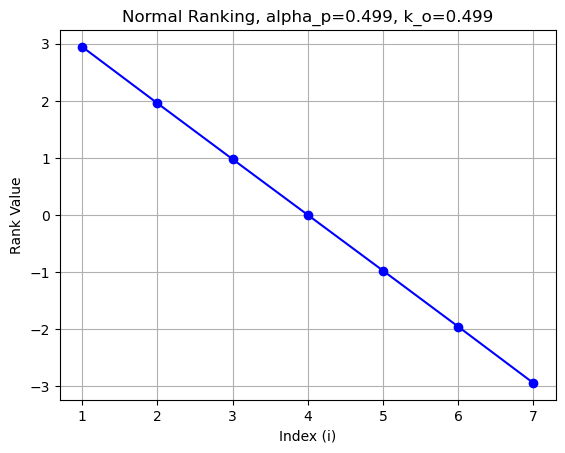

In [6]:
#Non Exception Ranking

import numpy as np
#non adjacent test cases

#rank with indices

def rank_mult(k_s, alpha, a, n, j):
        ind = j-1
        if j == 1:
            return k_s * ((1-alpha)/2) * (a[ind])
        elif j > 1 and j < n:
            return k_s * ((1-alpha)/2) * (a[ind] - a[ind-1])
        elif j == n:
            return k_s * ((1-alpha)/2) * (-a[ind-1])
        else:
             print('j index error')

#confirm 
def check_ranks(k_s, alpha, a, n):
    print('check_ranks')
    for j in range (1, n+1):
        rank_val = rank(j)
        rank_mult_val = rank_mult(k_s, alpha, a, n, j)
        print('rank: ', rank_val, 'rank_mult', rank_mult_val)    
        
        assert np.isclose(rank_val, rank_mult_val)   
    print('ranks are correct')
    
check_variables()
check_ranks(k_s, alpha, a, n)

index = list(range(1,n+1))

rank_vals = {}
rank_vals_array = np.zeros(n)

# Set variables for rankings
for i in range(1, n+1):
   i_ind = i - 1
   rank_vals[f'{i}'] = rank(i)
   print(rank_vals[f'{i}'])
   print(i_ind)
   rank_vals_array[i_ind] = rank_vals[f'{i}']

print(rank_vals_array)

plt.plot(index, rank_vals_array, marker='o', linestyle='-', color='b')
plt.title(f'Normal Ranking, alpha_p={alpha_prime}, k_o={k_o}')
plt.xlabel('Index (i)')
plt.ylabel('Rank Value')
plt.grid(True)
plt.xticks(index)  # Set the ticks to match the index values
plt.show()

#don't use for this experiment
def plot_normal():
    global rank_vals, rank_vals_array

    index = list(range(1,n+1))
    rank_vals = {}
    rank_vals_array = np.zeros(n)

    for i in range(1, n+1):
        i_ind = i-1
        rank_vals[f'{i}'] = rank(i)
        print(rank_vals[f'{i}'])
        rank_vals_array[i_ind] = rank_vals[f'{i}']

    # plt.plot(index, rank_vals_array, marker='o', linestyle='-', color='b')
    # plt.title(f'Normal Ranking, alpha_p={alpha_prime}, k_o={k_o}')  
    # plt.xlabel('Index (i)')
    # plt.ylabel('Rank Value')
    # plt.grid(True)
    # plt.xticks(index)  # Set the ticks to match the index values
    # plt.show()
    return rank_vals_array



1 :  1.976263681779483
2 :  0.9841845782996625
3 :  -0.003949897611793207
4 :  -0.0
5 :  0.003949897611793207
6 :  -0.9841845782996762
7 :  -1.976263681779483


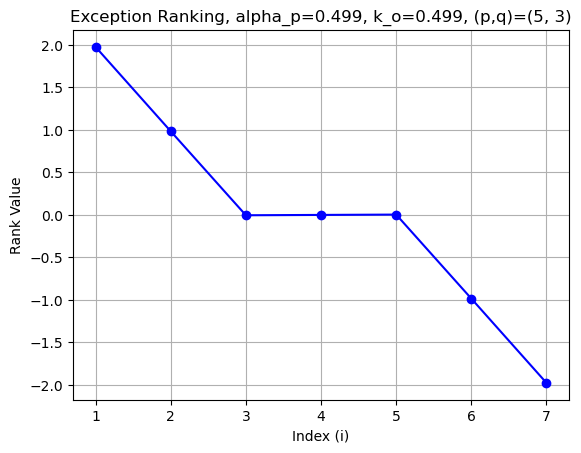

In [7]:
# Exception Ranking by formula
# rank_mult_exp(j): rank = alpha_prime * (b_i(j-1) - b_i(j) + c[1] * (delta(j,q) - delta(j,p)))


index = list(range(1,n+1))
rank_exp_vals = {}
rank_exp_vals_array = np.zeros(n)

for i in range(1, n+1):
   i_ind = i-1
   rank_exp_vals[f'{i}'] = rank_mult_exp_analytical(i) * -1
   print(i,': ', rank_exp_vals[f'{i}'])
   rank_exp_vals_array[i_ind] = rank_exp_vals[f'{i}']

plt.plot(index, rank_exp_vals_array, marker='o', linestyle='-', color='b')
plt.title(f'Exception Ranking, alpha_p={alpha_prime}, k_o={k_o}, (p,q)={p,q}')
plt.xlabel('Index (i)')
plt.ylabel('Rank Value')
plt.grid(True)
plt.xticks(index)  # Set the ticks to match the index values
plt.show()

def plot_exception():
   global rank_exp_vals, rank_exp_vals_array
   index = list(range(1,n+1))
   rank_exp_vals = {}
   rank_exp_vals_array = np.zeros(n)

   for i in range(1, n+1):
      i_ind = i-1
      rank_exp_vals[f'{i}'] = rank_mult_exp_analytical(i) * -1
      print(rank_exp_vals[f'{i}'])
      rank_exp_vals_array[i_ind] = rank_exp_vals[f'{i}']
      
   return rank_exp_vals_array

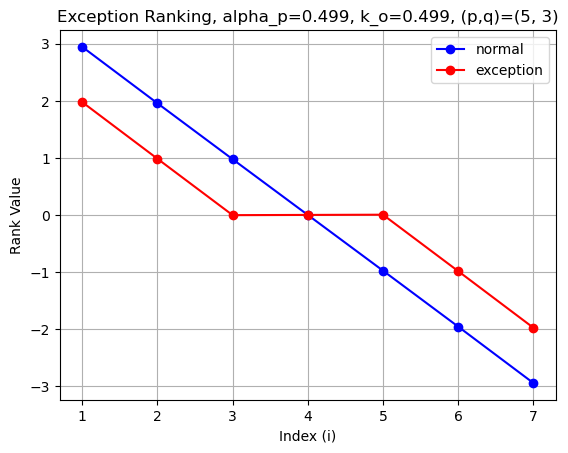

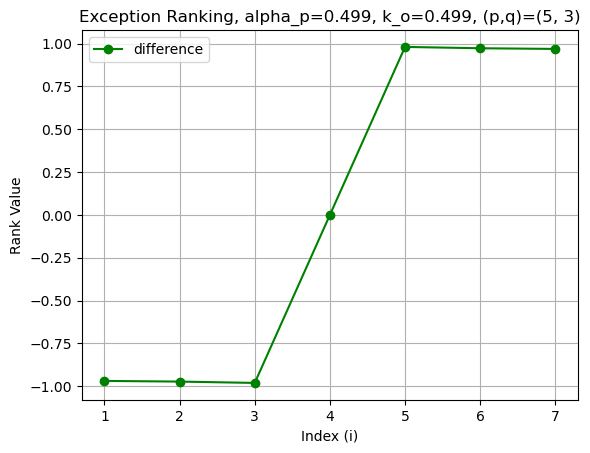

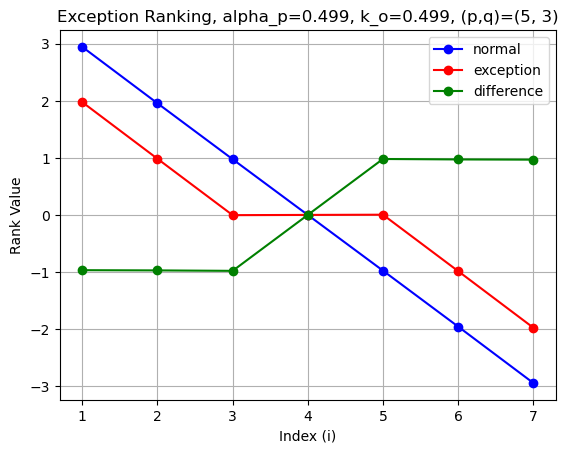

array([ 1.97626368,  0.98418458, -0.0039499 , -0.        ,  0.0039499 ,
       -0.98418458, -1.97626368])

In [8]:
def plot_overlay():
   index = list(range(1,n+1))
   plt.plot(index, rank_vals_array, marker='o', linestyle='-', color='b', label='normal')
   plt.plot(index, rank_exp_vals_array, marker='o', linestyle='-', color='r', label='exception')
   plt.legend()
   plt.title(f'Exception Ranking, alpha_p={alpha_prime}, k_o={k_o}, (p,q)={p,q}')
   plt.xlabel('Index (i)')
   plt.ylabel('Rank Value')
   plt.grid(True)
   plt.xticks(index)  # Set the ticks to match the index values
   plt.show()
   return rank_exp_vals_array

plot_overlay()

def plot_difference():
   index = list(range(1,n+1))
   plt.plot(index, rank_exp_vals_array - rank_vals_array, marker='o', linestyle='-', color='g', label='difference')
   plt.legend()
   plt.title(f'Exception Ranking, alpha_p={alpha_prime}, k_o={k_o}, (p,q)={p,q}')
   plt.xlabel('Index (i)')
   plt.ylabel('Rank Value')
   plt.grid(True)
   plt.xticks(index)  # Set the ticks to match the index values
   plt.show()
   return rank_exp_vals_array

plot_difference()

def plot_overlay_diff():
   index = list(range(1,n+1))
   plt.plot(index, rank_vals_array, marker='o', linestyle='-', color='b', label='normal')
   plt.plot(index, rank_exp_vals_array, marker='o', linestyle='-', color='r', label='exception')
   plt.plot(index, rank_exp_vals_array - rank_vals_array, marker='o', linestyle='-', color='g', label='difference')
   plt.legend()
   plt.title(f'Exception Ranking, alpha_p={alpha_prime}, k_o={k_o}, (p,q)={p,q}')
   plt.xlabel('Index (i)')
   plt.ylabel('Rank Value')
   plt.grid(True)
   plt.xticks(index)  # Set the ticks to match the index values
   plt.show()
   return rank_exp_vals_array

#This is actually wrong so fix later

plot_overlay_diff()

1 :  1.976263681779483
2 :  0.9841845782996625
3 :  -0.003949897611793207
4 :  -0.0
5 :  0.003949897611793207
6 :  -0.9841845782996762
7 :  -1.976263681779483
rank_exp_vals_array [ 1.97626368  0.98418458 -0.0039499  -0.          0.0039499  -0.98418458
 -1.97626368]
1 :  1.976263681779483
2 :  0.9841845782996625
3 :  -0.003949897611793207
4 :  -0.0
5 :  0.003949897611793207
6 :  -0.9841845782996762
7 :  -1.976263681779483
rank_exp_vals_array [ 1.97626368  0.98418458 -0.0039499  -0.          0.0039499  -0.98418458
 -1.97626368]
1 :  1.976263681779483
2 :  0.9841845782996625
3 :  -0.003949897611793207
4 :  -0.0
5 :  0.003949897611793207
6 :  -0.9841845782996762
7 :  -1.976263681779483
rank_exp_vals_array [ 1.97626368  0.98418458 -0.0039499  -0.          0.0039499  -0.98418458
 -1.97626368]
1 :  1.976263681779483
2 :  0.9841845782996625
3 :  -0.003949897611793207
4 :  -0.0
5 :  0.003949897611793207
6 :  -0.9841845782996762
7 :  -1.976263681779483
rank_exp_vals_array [ 1.97626368  0.9841845

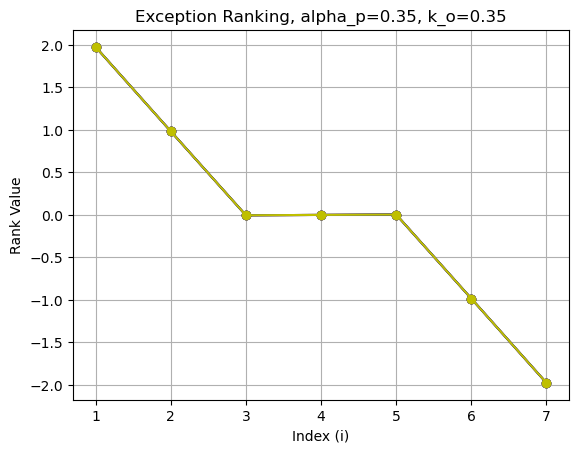

In [11]:
#fix loops
#probably rank_mult is wrong

def exper_critical_pairs():
    #rank arrays for each k_o
    k_o_array = np.array([0.499, 0.49, 0.45, 0.35])
    rank_exp_vals_k_o_array = []

    #set parameters 1
    n = 7
    k_o = 0.499
    k_s = 1
    alpha = 1 - (2 * (k_o/k_s))
    alpha_prime = k_o/k_s
    p = 5
    q = 3
    c_var = 0
    lamb_val = np.arccosh((1+c_var)/(1-alpha))

    index = list(range(1,n+1))
    rank_exp_vals = {}
    rank_exp_vals_array = np.zeros(n)

    for j in range(1, n+1):
        i_ind = j-1
        rank_exp_vals[f'{j}'] = rank_mult_exp_analytical(j) * -1
        print(j,': ', rank_exp_vals[f'{j}'])
        rank_exp_vals_array[i_ind] = rank_exp_vals[f'{j}']
    
    print('rank_exp_vals_array', rank_exp_vals_array)
    rank_exp_vals_k_o_array.append(rank_exp_vals_array.copy())

    #set parameters 2
    n = 7
    k_o = 0.49
    k_s = 1
    alpha = 1 - (2 * (k_o/k_s))
    alpha_prime = k_o/k_s
    p = 5
    q = 3
    c_var = 0
    lamb_val = np.arccosh((1+c_var)/(1-alpha))

    index = list(range(1,n+1))
    rank_exp_vals = {}
    rank_exp_vals_array = np.zeros(n)

    for j in range(1, n+1):
        i_ind = j-1
        rank_exp_vals[f'{j}'] = rank_mult_exp_analytical(j) * -1
        print(j,': ', rank_exp_vals[f'{j}'])
        rank_exp_vals_array[i_ind] = rank_exp_vals[f'{j}']
    
    print('rank_exp_vals_array', rank_exp_vals_array)
    rank_exp_vals_k_o_array.append(rank_exp_vals_array)

    #set parameters 3
    n = 7
    k_o = 0.45
    k_s = 1
    alpha = 1 - (2 * (k_o/k_s))
    alpha_prime = k_o/k_s
    p = 5
    q = 3
    c_var = 0
    lamb_val = np.arccosh((1+c_var)/(1-alpha))

    index = list(range(1,n+1))
    rank_exp_vals = {}
    rank_exp_vals_array = np.zeros(n)

    for j in range(1, n+1):
        i_ind = j-1
        rank_exp_vals[f'{j}'] = rank_mult_exp_analytical(j) * -1
        print(j,': ', rank_exp_vals[f'{j}'])
        rank_exp_vals_array[i_ind] = rank_exp_vals[f'{j}']
    
    print('rank_exp_vals_array', rank_exp_vals_array)
    rank_exp_vals_k_o_array.append(rank_exp_vals_array)

    #set parameters 4
    n = 7
    k_o = 0.35
    k_s = 1
    alpha = 1 - (2 * (k_o/k_s))
    alpha_prime = k_o/k_s
    p = 5
    q = 3
    c_var = 0
    lamb_val = np.arccosh((1+c_var)/(1-alpha))

    index = list(range(1,n+1))
    rank_exp_vals = {}
    rank_exp_vals_array = np.zeros(n)

    for j in range(1, n+1):
        i_ind = j-1
        rank_exp_vals[f'{j}'] = rank_mult_exp_analytical(j) * -1
        print(j,': ', rank_exp_vals[f'{j}'])
        rank_exp_vals_array[i_ind] = rank_exp_vals[f'{j}']
    
    print('rank_exp_vals_array', rank_exp_vals_array)
    rank_exp_vals_k_o_array.append(rank_exp_vals_array)

    #get margins
    colors = ['r', 'g', 'b', 'y']
    for i in range(0, len(k_o_array)):
        plt.plot(index, rank_exp_vals_k_o_array[i], marker='o', linestyle='-', color=colors[i], label=f'k_o={k_o_array[i]}')
    plt.title(f'Exception Ranking, alpha_p={alpha_prime}, k_o={k_o}')
    plt.xlabel('Index (i)')
    plt.ylabel('Rank Value')
    plt.grid(True)
    plt.xticks(index)
    plt.show()
    
exper_critical_pairs()

In [14]:
rank_exp_vals_k_o_array = [[][]]

#set parameters 1
n = 7
k_o = 0.499
k_s = 1
alpha = 1 - (2 * (k_o/k_s))
alpha_prime = k_o/k_s
p = 5
q = 3
c_var = 0
lamb_val = np.arccosh((1+c_var)/(1-alpha))

index = list(range(1,n+1))
rank_exp_vals = {}
rank_exp_vals_array = np.zeros(n)

for j in range(1, n+1):
    i_ind = j-1
    rank_exp_vals[f'{j}'] = rank_mult_exp_analytical(j) * -1
    print(j,': ', rank_exp_vals[f'{j}'])
    rank_exp_vals_array[i_ind] = rank_exp_vals[f'{j}']

print('rank_exp_vals_array', rank_exp_vals_array)
rank_exp_vals_k_o_array.append(rank_exp_vals_array)
print(k_o)

#set parameters 2
n = 7
k_o = 0.45
k_s = 1
alpha = 1 - (2 * (k_o/k_s))
alpha_prime = k_o/k_s
p = 5
q = 3
c_var = 0
lamb_val = np.arccosh((1+c_var)/(1-alpha))

index = list(range(1,n+1))
rank_exp_vals = {}
rank_exp_vals_array = np.zeros(n)

for j in range(1, n+1):
    i_ind = j-1
    rank_exp_vals[f'{j}'] = rank_mult_exp_analytical(j) * -1
    print(j,': ', rank_exp_vals[f'{j}'])
    rank_exp_vals_array[i_ind] = rank_exp_vals[f'{j}']

print('rank_exp_vals_array', rank_exp_vals_array)
rank_exp_vals_k_o_array.append(rank_exp_vals_array)
print(k_o)


#set parameters 3
n = 7
k_o = 0.45
k_s = 1
alpha = 1 - (2 * (k_o/k_s))
alpha_prime = k_o/k_s
p = 5
q = 3
c_var = 0
lamb_val = np.arccosh((1+c_var)/(1-alpha))

index = list(range(1,n+1))
rank_exp_vals = {}
rank_exp_vals_array = np.zeros(n)

for j in range(1, n+1):
    i_ind = j-1
    rank_exp_vals[f'{j}'] = rank_mult_exp_analytical(j) * -1
    print(j,': ', rank_exp_vals[f'{j}'])
    rank_exp_vals_array[i_ind] = rank_exp_vals[f'{j}']

print('rank_exp_vals_array', rank_exp_vals_array)
rank_exp_vals_k_o_array.append(rank_exp_vals_array)

#set parameters 4
n = 7
k_o = 0.35
k_s = 1
alpha = 1 - (2 * (k_o/k_s))
alpha_prime = k_o/k_s
p = 5
q = 3
c_var = 0
lamb_val = np.arccosh((1+c_var)/(1-alpha))

index = list(range(1,n+1))
rank_exp_vals = {}
rank_exp_vals_array = np.zeros(n)

for j in range(1, n+1):
    i_ind = j-1
    rank_exp_vals[f'{j}'] = rank_mult_exp_analytical(j) * -1
    print(j,': ', rank_exp_vals[f'{j}'])
    rank_exp_vals_array[i_ind] = rank_exp_vals[f'{j}']

print('rank_exp_vals_array', rank_exp_vals_array)
rank_exp_vals_k_o_array.append(rank_exp_vals_array)

#get margins
colors = ['r', 'g', 'b', 'y']
for i in range(0, len(k_o_array)):
    plt.plot(index, rank_exp_vals_k_o_array[i], marker='o', linestyle='-', color=colors[i], label=f'k_o={k_o_array[i]}')
plt.title(f'Exception Ranking, alpha_p={alpha_prime}, k_o={k_o}')
plt.xlabel('Index (i)')
plt.ylabel('Rank Value')
plt.grid(True)
plt.xticks(index)
plt.show()


1 :  1.976263681779483
2 :  0.9841845782996625
3 :  -0.003949897611793207
4 :  -0.0
5 :  0.003949897611793207
6 :  -0.9841845782996762
7 :  -1.976263681779483
rank_exp_vals_array [ 1.97626368  0.98418458 -0.0039499  -0.          0.0039499  -0.98418458
 -1.97626368]
0.499
1 :  1.2256889091323149
2 :  0.4980642222728295
3 :  -0.11887952630380288
4 :  -0.0
5 :  0.11887952630380288
6 :  -0.4980642222728295
7 :  -1.2256889091323149
rank_exp_vals_array [ 1.22568891  0.49806422 -0.11887953 -0.          0.11887953 -0.49806422
 -1.22568891]
0.45
[ 1.22568891  0.49806422 -0.11887953 -0.          0.11887953 -0.49806422
 -1.22568891]
